## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_results.rename(columns = {'Tumor Volume (mm3)':'Total_vol'}, inplace = True)  

#v_dregimen_df = study_results['Drug Regimen']
#v_mouse_id_df = study_results['Mouse ID']
v_tumor_vol_df = study_results['Total_vol']
v_tumor_mean = np.mean(v_tumor_vol_df)
v_tumor_median= np.median(v_tumor_vol_df)
v_tumor_mode = st.mode(v_tumor_vol_df)
v_tumor_var= np.var(v_tumor_vol_df,ddof = 0)
v_tumor_std = np.std(v_tumor_vol_df,ddof = 0)
v_tumor_sem =sem(study_results.Total_vol)


data_list = {'Mean':[v_tumor_mean], 'Median':[v_tumor_median],
              'Variance':[v_tumor_var],'Standar Deviation':[v_tumor_std],
              'SEM':[v_tumor_sem]}
summary_df = pd.DataFrame(data_list) 
summary_df.head(10)
summary_df.head(10).style.format({"Mean":"{:20,.2f}","Median":"{:20,.2f}",
                                 "Variance":"{:20,.2f}","Standar Deviation":"{:20,.2f}"
                                 ,                                 "SEM":"{:20,.4f}"
                                 })



,Mean,Median,Variance,Standar Deviation,SEM
0,50.45,48.95,79.07,8.89,0.2044


## Bar plots

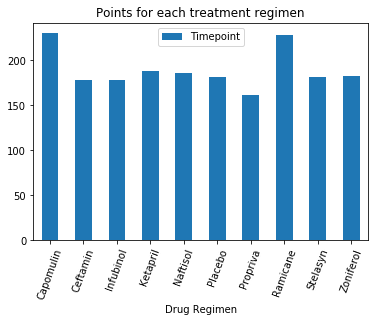

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# step 1 merge 2 df 
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
# step 2 select columns needed and group it
val_columns_df =new_t_df[['Drug Regimen','Mouse ID','Timepoint']]
# step 3 group by regime and convent this results in to a df
return_a_df = pd.DataFrame({'Timepoint' : val_columns_df.groupby( ['Drug Regimen'] ).size()}).reset_index()
return_a_df
#Create a barchart
return_a_df.plot.bar(x="Drug Regimen", y="Timepoint", rot=70, title="Points for each treatment regimen");


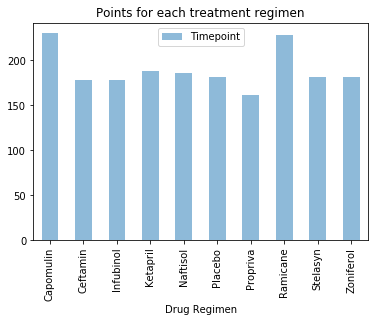

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# step 1 merge 2 df 
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
# step 2 select columns needed and group it
val_columns_df =new_t_df[['Drug Regimen','Mouse ID','Timepoint']]
# step 3 group by regime and convent this results in to a df
return_a_df = pd.DataFrame({'Timepoint' : val_columns_df.groupby( ['Drug Regimen'] ).size()}).reset_index()
return_a_df

ax = return_a_df.plot.bar(x='Drug Regimen', y='Timepoint',alpha=0.5)
#plt.xticks(y, 'Drug Regimen')
#plt.ylabel('Timepoint')
plt.title('Points for each treatment regimen')
plt.show()


## Pie plots

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_val_df =mouse_metadata.groupby("Sex").size()
#a =mouse_metadata["Sex"].value_counts()
print(a)
gen_val_df.plot.pie(figsize=(4,4))


NameError: name 'a' is not defined

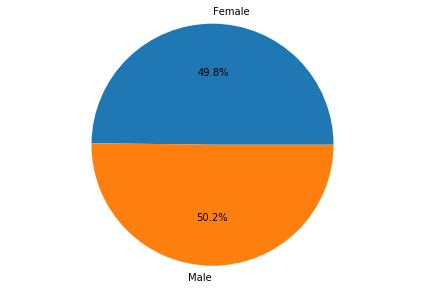

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gen_val_df =mouse_metadata.groupby("Sex").size()
# Conver a gropy data to a data frame
return_a_df = pd.DataFrame({'count_v' : mouse_metadata.groupby( ["Sex"] ).size()}).reset_index()
#return_a_df["count_v"]
# Create a pie chart
plt.pie(return_a_df["count_v"]  , labels=return_a_df['Sex'],autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#step 1 get the data (columns to work with)
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
#new_t_df
# step 2 select columns needed and group it
val_columns_df = new_t_df[['Drug Regimen','Mouse ID','Timepoint','Total_vol']]
val_columns_df=val_columns_df.loc[(val_columns_df['Drug Regimen'] == 'Capomulin') &
               (val_columns_df['Mouse ID'] == 's710')]
    #          df.loc            [(df            ['column_name' ] >= A           ) &
               #(df           ['column_name'] <= B)]
val_columns_df
#df.loc[df['column_name'] == some_value]
# step 3 group by regime and convent this results in to a df
##return_a_df = pd.DataFrame({'Timepoint' : val_columns_df.groupby( ['Drug Regimen'] ).size()}).reset_index()
##return_a_df

,Drug Regimen,Mouse ID,Timepoint,Total_vol
232,Capomulin,s710,0,45.000000
300,Capomulin,s710,5,43.180977
534,Capomulin,s710,10,43.688026
874,Capomulin,s710,15,41.845235
1105,Capomulin,s710,20,42.629963
1129,Capomulin,s710,25,43.060409
1448,Capomulin,s710,30,43.571703
1607,Capomulin,s710,35,44.160519
1666,Capomulin,s710,40,40.171920
1854,Capomulin,s710,45,40.728578


In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen